<a href="https://colab.research.google.com/github/AnilUGayki/AirBnb-Bookings-Analysis/blob/AirBnb-Statge/AirBnB_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Know Your Data**

### Import Libraries

In [ ]:
#import numpy
import numpy as np
#import pandas
import pandas as pd
#import matlotlib
import matplotlib.pyplot as plt

### Loading Dataset

In [ ]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')
# Give proper data set path
airbnb_data_file="/content/drive/My Drive/Colab Notebooks/CapstoneProject/Airbnb-NYC-2019.csv"


Mounted at /content/drive


### Dataset first view

In [ ]:
# Create Dataframe
airbnb_df = pd.read_csv(airbnb_data_file)
#Print dataframe view
airbnb_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


### Dataset rows and column count

In [ ]:
#print datatset rows and column count
airbnb_df.shape

(48895, 16)

### Dataset information

In [ ]:
#print the dataset information
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Duplicate rows count

In [ ]:
# we can use duplicate().sum() function to count duplicate rows
duplicate_count = airbnb_df.duplicated().sum()
print(duplicate_count)

0


### Missing Values/Null Values

In [ ]:
# count the number of missing values in each column
missing_count = airbnb_df.isnull().sum()
#visualize the missing count in each column
print('Number of missing values in each column:\n', missing_count)

Number of missing values in each column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### What did you know about your dataset?
  - The dataset has information related to bookings and host registered with AirBnb.
  - It has information about pricing, minimum night spends, reviews, locations.

#**2. Understanding Your Variables**

### Dataset columns

In [ ]:
#print the dataset columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Dataset Describe

In [ ]:
#Describe the dataset
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

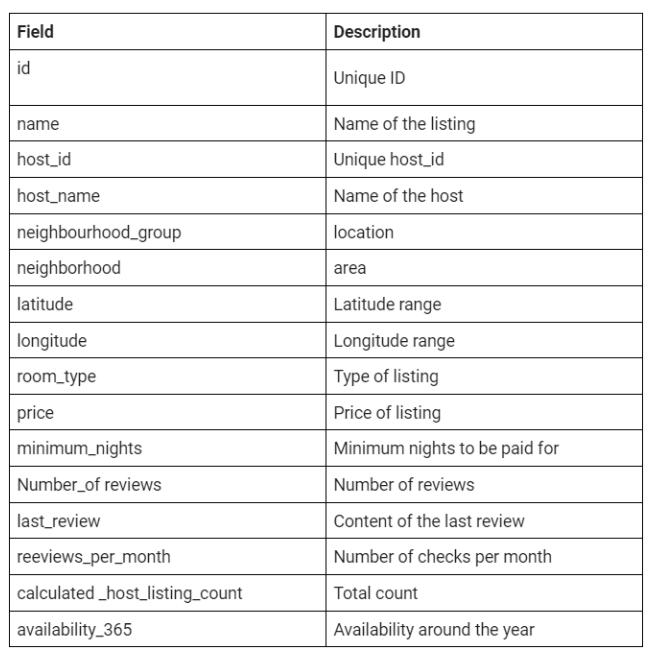

### Check Unique Values for each variable.

In [ ]:
# .unique() function can be used to get the non repeated values for respective columns
for column in airbnb_df.columns:
        unique_values = airbnb_df[column].unique()
        print(f"Unique values for {column}: {unique_values}")

#**3. Data Wrangling**

### Data Wrangling Code

### Analysis

**1.Analysis of room types provided by AirBnB. (Which room type is more prefered by customers.)**

In [ ]:
# Create data for above analysis.
bookings_per_room_type = airbnb_df["room_type"].value_counts()
print(bookings_per_room_type)


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


What all manipulations have you done and insights you found?

Answer:-
  - I have created series with room_type and counted its values.
  - I wanted to plot which room_type is most prefered.
  - From above numbers, it seems that Entire home/apt in mostly prefered.


Text(0.5, 0, 'Room Type')

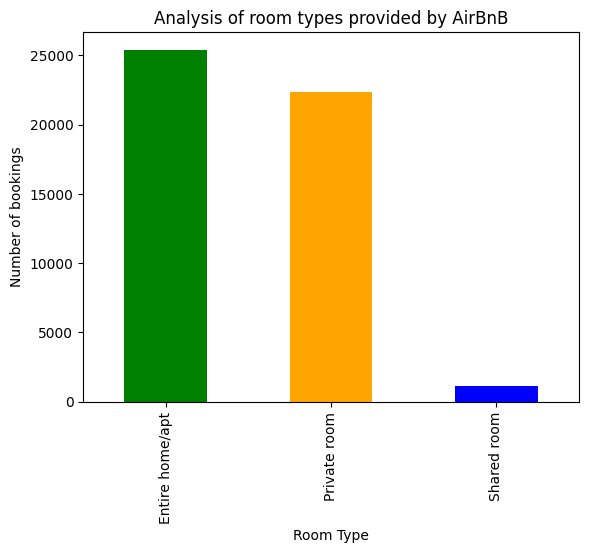

In [ ]:
#Create bar graph
# Create the plot object
shades=['green','orange','blue']
bookings_per_room_type.plot(kind='bar', color=shades)

plt.title('Analysis of room types provided by AirBnB')
plt.ylabel('Number of bookings')
plt.xlabel('Room Type')


Why did you pick the specific chart?

Answer:-

Bar charts are simple to read and interpret. The length of each bar represents the size or value of the data being represented, making it easy to compare different data points.

Bar charts are particularly useful for categorical data, where the data points can be divided into discrete categories. The categories can be placed on the x-axis, and the frequency or value of each category can be represented by the height of the bar.

 What is/are the insight(s) found from the chart?

 Answer:-

 - As per above bar chart, as it has compared the number of bookings of each room type. The entire home/apt has highest bar length.
 - From the lenght of bars we can say that entire home/apt has frquent bookings.
So, above points shows that, Entire home/apt is mostly prefered by customers over Shared and Private room.

**2. Analysis of locations(neighbourhood_group) prefered by customers.**

In [ ]:
# Create data for above analysis.
bookings_per_neighbourhood_group = airbnb_df["neighbourhood_group"].value_counts()
print(bookings_per_neighbourhood_group)


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


What all manipulations have you done and insights you found?

Answer:-

I have created series with room_type and counted its values.
I wanted to plot which room_type is most prefered.
From above numbers, it seems that Entire home/apt in mostly prefered.

Text(0.5, 0, 'Neighbourhood Groups')

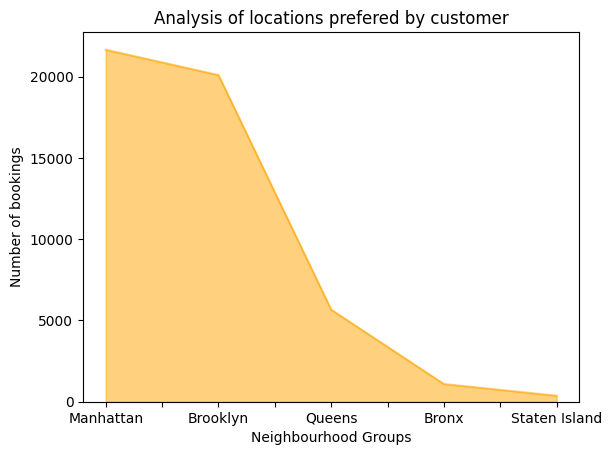

In [ ]:
# Create plot of bookings count with respect to locations.
shades=['orange']
bookings_per_neighbourhood_group.plot(kind='area',stacked=False,color=shades)
plt.title('Analysis of locations prefered by customer')
plt.ylabel('Number of bookings')
plt.xlabel('Neighbourhood Groups')


Why did you pick the specific chart?
Answer: - 
- Area chart is prefered when we need to find Proportional relationship, here i wanted to find relationship between locations and bookigs. I wanted to observer the bookings area over locations.  
- As compared to line chart in area chart we can easily look at the filled area where its high, stable, increasing, decreating with respect to location. 
Thats why I pick up the area chart over line chart.

What is/are the insight(s) found from the chart?
- Manhattan is mostly prefered location by customers.
- Brooklyn is at top 2nd position prefered location by customers.
- Staten Island is least prefered by customers. 
Business managers can take a look at least prefered location by customer with respect to services they are offereing.

**3. Analysis of average price over room type (What is price distribution based on room type)**

In [ ]:
#Create data for above analysis
# group the data by room type and calculate the mean of price
mean_by_room_type = airbnb_df.groupby('room_type')['price'].mean().reset_index()
mean_by_room_type.head()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


What all manipulations have you done and insights you found?
  - I calculated the average price paid by customers to each room type.
  - We can use the mean to compare different room type with respect to expense spend by customers. By calculating the mean for each dataset, we can easily compare their average values and identify any differences or similarities.
  - I have found that most money is spend on Entire home/apt room type.

Text(0, 0.5, 'Average Price')

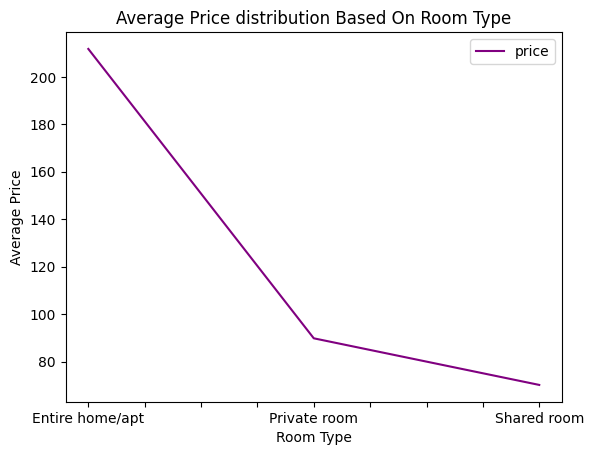

In [ ]:
#Plot the above insights
mean_by_room_type.plot(x='room_type',y='price', kind='line', color='purple')
plt.title('Average Price distribution Based On Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

Why did you pick the specific chart?
- Line chart is used mostly to get the trend over time, but here I wanted to showcase trend over room cateories.

What is/are the insight(s) found from the chart?
 - The Entire home/apt room category is trending among others. It has most prefered and customers has spend more on it as its average price is high as compared to others.

**4. Analysis of reviews with respect to host_names (Which host_name has more reviews)**

In [ ]:
#Code to get data for above analysis
reviews_per_host = airbnb_df.groupby('host_name')['number_of_reviews'].sum().reset_index()
sorted_df=reviews_per_host.sort_values(by='number_of_reviews', ascending=False)
top_20_reviews=sorted_df.head(20)

What all manipulations have you done and insights you found?
  - I have calculated total reviews per host name.
  - Then sorted that data, to showcase top 20 host names which has highest reviews as compared to all.
  - I found that we can use sum function on dataframe to get total of all values per respective column values we need to group with.
  - here I have created a group of host_name and sum of number_of_reviews.
  - It shows host name and its reviews total in pair as a row.

Text(0, 0.5, 'Number of Reviews')

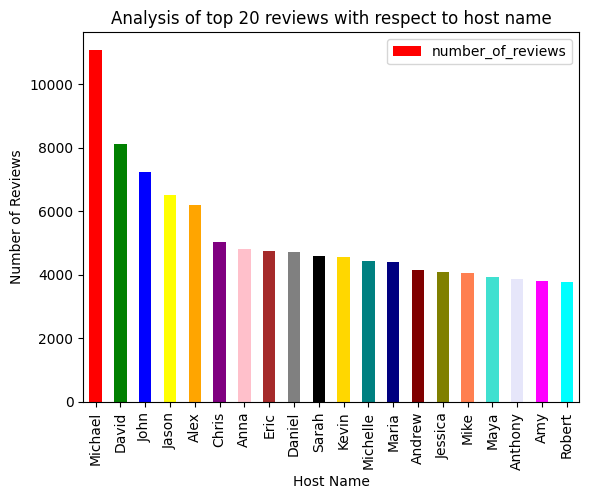

In [ ]:
#Create bar graph
# Create the plot object
top_20_reviews.plot(x='host_name',y='number_of_reviews',kind='bar',color = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black',
          'gold', 'teal', 'navy', 'maroon', 'olive', 'coral', 'turquoise', 'lavender', 'magenta', 'cyan'])
plt.title('Analysis of top 20 reviews with respect to host name')
plt.xlabel('Host Name')
plt.ylabel('Number of Reviews')

Why did you pick the specific chart?
  - I wanted to show volume of reviews per host, that volume can be represented by height of bar in bar chart.

What is/are the insight(s) found from the chart?
 - I have found top 20 host names which has highest reviews. 
 - Business owners can plan some appreciations for those hosts which has high review count.

**4. Analysis of corelation between availability over 365 days, minimum nights paids, price and host count **

In [ ]:
# code for data analysis
bookings_data_df = airbnb_df[['number_of_reviews', 'price', 'minimum_nights', 'availability_365','calculated_host_listings_count']]

In [ ]:
bookings_corr_df = bookings_data_df.corr()
bookings_corr_df

,number_of_reviews,price,minimum_nights,availability_365,calculated_host_listings_count
number_of_reviews,1.000000,-0.047954,-0.080116,0.172028,-0.072376
price,-0.047954,1.000000,0.042799,0.081829,0.057472
minimum_nights,-0.080116,0.042799,1.000000,0.144303,0.127960
availability_365,0.172028,0.081829,0.144303,1.000000,0.225701
calculated_host_listings_count,-0.072376,0.057472,0.127960,0.225701,1.000000


What all manipulations have you done and insights you found?
  - I have created a separate dataframe with number_of_reviews, price, minimum_nights, availability over 365 days, calculated host listing count.
  - I have used correlation function to create a manipulated dataframe has pairwise correlation in between columns.
  - Here some values are positive shows postitve correlation between columns.
  - Here some values are negative shows inverse correlation between columns.
e.g. 1) number_of_reviews has positive correlation coeficient with availability_365. it means whoever maintain high availability can get more reviews. 
    2) number_of_reviews has negative coeficient with price. it means they are inversaly propertional. If one increases other will decreases. Simply if price increases it will lessen the reviews count because of less bookings. If price decreases, more reviews count because of more bookings.

In [ ]:
import seaborn as sns

<Axes: >

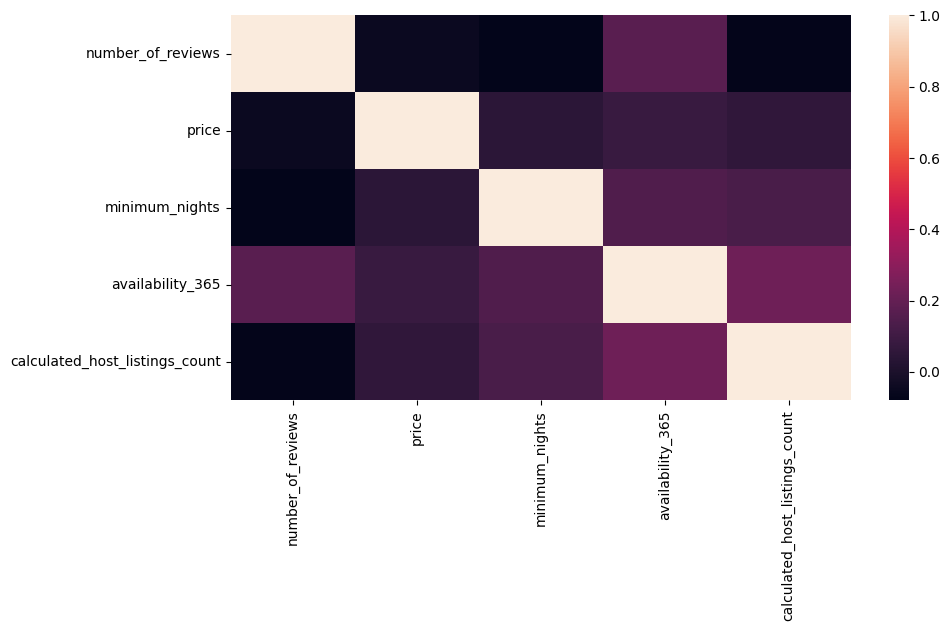

In [ ]:
#plot the above analysis may be as heatmap
plt.figure(figsize=(10,5))
sns.heatmap(bookings_corr_df)

Why did you pick the specific chart?
  - heatmap is best to see correlations between different paramereters.
  - It can show positive and negative effects based on the grades of shade.
  - Dark shade shows negative/inverse propertion/relation
  - Light shade shows positve/direct propertion/relation.

What is/are the insight(s) found from the chart?
 - number of reviews is directly propertion with availability
 - price is directly propertional with availability, minimum nights, and host lisitng count.
 - availabilty is directly propertional to all other parameters. Means changes in availabilty will directly affect other values.

**5. Analysis of availability over neighbourhood group**

In [ ]:
#code for data analysis of above requirement
groups_available=airbnb_df.groupby('neighbourhood_group')['availability_365'].sum().reset_index()
groups_available.head()

,neighbourhood_group,availability_365
0,Bronx,180843
1,Brooklyn,2015070
2,Manhattan,2425586
3,Queens,818464
4,Staten Island,74480


What all manipulations have you done and insights you found?
  - I used same groupby function to get the total availablity per neighbourhood group.
  - Manhattan has highest availability among others.

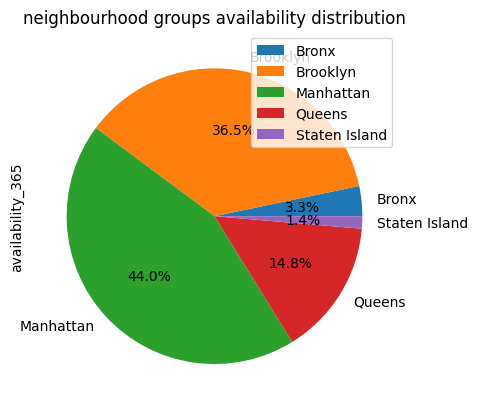

In [ ]:
# PLot the availability percentage with respect to neighbourhood groups using pie chart.
groups_available.plot(kind='pie', y='availability_365',labels=groups_available['neighbourhood_group'],autopct='%1.1f%%')
plt.title('neighbourhood groups availability distribution')
plt.show()

Why did you pick the specific chart?
  - Pie charts are commonly used in data visualization to represent categorical data and show the proportion or percentage distribution of different categories within a whole.
  - I wanted to show availability in percentage.

What is/are the insight(s) found from the chart?
  - Manhattan neighbourhood group has high percentage of avalability.